In [149]:
# importing data dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [150]:
# importing CDV data file
dataset = pd.read_csv('Train.csv')

In [151]:
# checking rows and cols of the data
dataset.shape

(8523, 12)

In [152]:
# getting info regarding the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [153]:
#checking null values in columns
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [154]:
#data encoding
#print(dataset.Outlet_Size.value_counts())
dataset.replace({'Outlet_Size' : {'Medium' : 0,'Small' : 1 ,'High':2}},inplace=True)

In [155]:
# handling null values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer2 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(dataset.iloc[:, 1:2])
imputer2.fit(dataset.iloc[:, 8:9])
dataset.iloc[:, 1:2] = imputer.transform(dataset.iloc[:, 1:2])
dataset.iloc[:, 8:9] = imputer2.transform(dataset.iloc[:, 8:9])

In [156]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,0.695567,2181.288914
std,4.226124,0.051598,62.275067,8.371760,0.608788,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,0.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,0.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,0.695567,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,1.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,2.000000,13086.964800


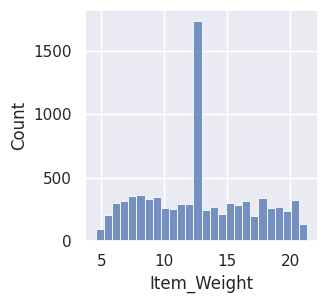

In [157]:
#visualing distribution of different features
sns.set()
plt.figure(figsize=(3,3))
sns.histplot(dataset['Item_Weight'])
plt.show()

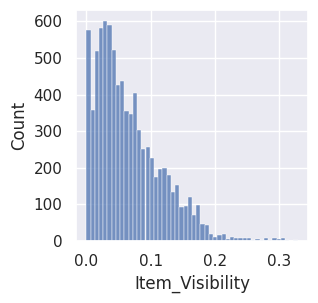

In [158]:
plt.figure(figsize=(3,3))
sns.histplot(dataset['Item_Visibility'])
plt.show()

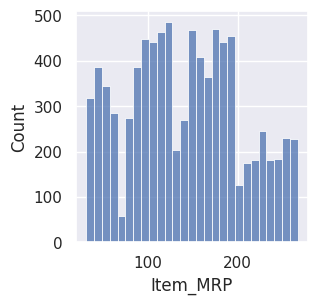

In [159]:
plt.figure(figsize=(3,3))
sns.histplot(dataset['Item_MRP'])
plt.show()

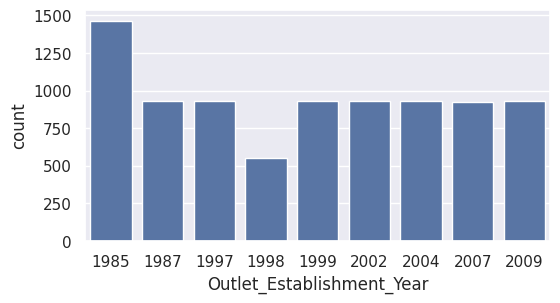

In [160]:
plt.figure(figsize=(6,3))
sns.countplot(x='Outlet_Establishment_Year', data=dataset)
plt.show()

In [170]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder();
dataset['Item_Identifier'] = encoder.fit_transform(dataset['Item_Identifier'])
dataset['Item_Type'] = encoder.fit_transform(dataset['Item_Type'])
dataset['Outlet_Identifier'] = encoder.fit_transform(dataset['Outlet_Identifier'])
dataset['Outlet_Location_Type'] = encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset['Item_Fat_Content'] = encoder.fit_transform(dataset['Item_Fat_Content'])
dataset['Outlet_Type'] = encoder.fit_transform(dataset['Outlet_Type'])

In [171]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,0.000000,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,0.000000,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,0.000000,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,0.695567,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,2.000000,2,1,994.7052


In [172]:
# allocating X and y variables
X = dataset.drop(['Item_Outlet_Sales'],axis=1)
y = dataset['Item_Outlet_Sales']

In [173]:
#splitting data set into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [175]:
#applying linear model to train set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10)
regressor.fit(X,y)
x_pred = regressor.predict(X_test)

In [177]:
#checking accuracy comparing values of predicted X with actual y
error_score = metrics.r2_score(y_test, x_pred)
print("Error score using Random Forest Regression : ",error_score)

Error score : Random Forest Regression :  0.9204965471917167


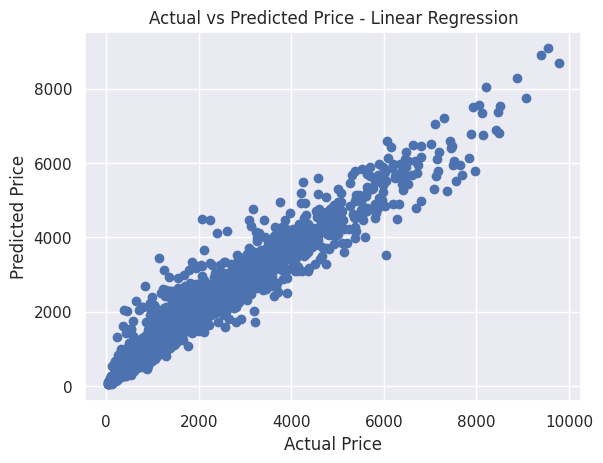

In [178]:
#visualing actual and predicted values
plt.scatter(y_test,x_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price - Linear Regression")
plt.show()